## 1. Linear regression prediction and confidence interval:
### 내가 예측한 y값이 95%확률로 실제 y값을 포함할 구간 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn import metrics  #metrics가져오면 평가지표 가져올 수 있음
%matplotlib inline

### 1.1. Load the 'Boston' dataset from Scikit-Learn:
<br>
study = an array that contains the hours of study. This is the explanatory variable. x변수 (공부시간)<br>
score = an array that contains the test scores. This is the response variable. y변수 (성적)

In [2]:
study = np.array([ 3, 4.5, 6, 1.2, 2, 6.9, 6.7, 5.5])  #x(공부시간)
score = np.array([ 88, 85, 90, 80, 81, 92, 95, 90])    #y(성적)
n = study.size

### 1.2 Training:

In [3]:
#선형회귀 객체를 만듬
lm = LinearRegression()  

In [4]:
#학습
lm.fit(study.reshape(-1,1), score.reshape(-1,1))  
#위에서 만든 x,y넘피배열은 숫자가 들수날쑥이라 열과 행의 개수 맞게 reshape(-1)해줌(shape가 맞지 않아서)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
#파라미터 가져오기
b0 = lm.intercept_[0]  #베타 0은 리스트라 첫번째 원소 가져와야함
b1 = lm.coef_[0][0]    #베타 1은 00을 가져와야 함
print(b0)
print(b1)

#77.68은 공부 아예 안해도 얻을 수 있는 성적
#2.22 공부 1시간 더할수록 오르는 점수

77.68466977583873
2.2213028433879947


In [6]:
#RMSE 계산(제곱된 오차의 평균의 루트)
predScore = lm.predict(study.reshape(-1,1))  
#위에서 사용한 x그대로 사용(학습할 때 x그대로 사용했기에)
#tranin,test구분 안했으므로 in-sample (추세선 구할 때는 분리안함)

mse = metrics.mean_squared_error(score, predScore) #metrics모듈에서 MSE함수 가져다가 계산(실제 y,예측된 y)
rmse=np.sqrt(mse)  #RMSE 계산
np.round(rmse,2)  

1.93

### 1.3. Confidence interval and visualization: 신뢰구간 및 시각화

In [7]:
# 표준오차 계산하는 함수 정의
# p121 수식 참고
def StdError(x_star, x_vec, mse, n): #표준오차 구하는 수식
    x_mean = np.mean(x_vec)
    return (np.sqrt(mse*(1/n+(x_star-x_mean)**2/np.sum((x_vec-x_mean)**2))))  #mse가져와 제곱

In [8]:
# y_hat : 예측된 y
# y_low : 신뢰구간의 하한(95%), y_up : 신뢰구간의 상한(95%)

x_star = np.linspace(1,9,10)   #linsapce로 시작과 끝점 정하고, 10점으로 쪼갬
y_hat = b0 + b1*x_star         #베타0(절편), 베타1(기울기)
#위의 두 식을 서로 곱하고 더함

y_low = y_hat - st.t.ppf(0.975,n-2)*StdError(x_star,study,mse,n) 
y_up = y_hat + st.t.ppf(0.975,n-2)*StdError(x_star,study,mse,n)
#st.t.ppt 통계모듈 가져와 97분위수, 자유도는 n-2로 y_hat +-해서 상한과 하한 계산
    
#99% 신뢰구간을 만들고싶다면 분위수에 0.995 넣음

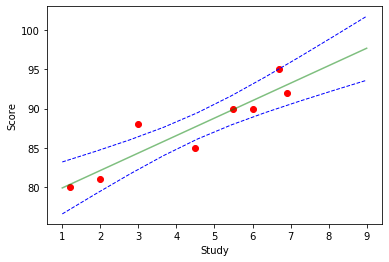

In [9]:
#시각화
plt.scatter(study, score, c='red')
plt.plot(x_star,y_low,c = 'blue',linestyle='--',linewidth=1)
plt.plot(x_star,y_hat,c = 'green',linewidth = 1.5, alpha=0.5)
plt.plot(x_star,y_up,c = 'blue',linestyle='--',linewidth=1)
plt.xlabel('Study')
plt.ylabel('Score')
plt.show()

#절편만 움직이는게 아니라 기울기도 움직여서 허리가 잘록한 모양임